# TASK #1:  BUSINESS CASE


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=11BquVVgQTebvVO5NZ2TGA526rulbWBv5"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Analyzing Customer Sentiment
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1HfZvPCWAwKoYl1qogYlxD_CIZYxYw0aI)

![alt text](https://drive.google.com/uc?id=1XGc89Cxi0ooFQIc6o041cz8-qwXg7l3g)

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [112]:
import numpy as np
import pandas as pd
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report, confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
reviews_df = pd.read_csv('amazon_alexa.tsv', sep='\t')
reviews_df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [5]:
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [6]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [8]:
reviews_df['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

# TASK #3: EXPLORE DATASET

<AxesSubplot:>

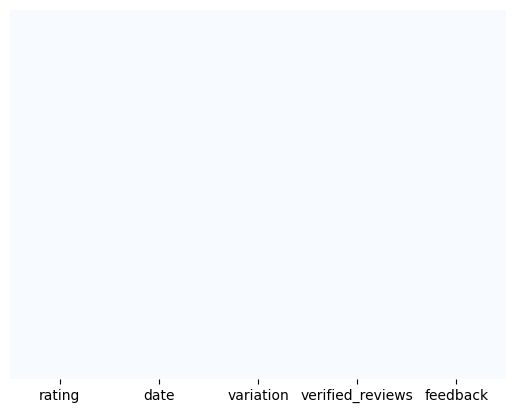

In [9]:
sns.heatmap(reviews_df.isnull(),yticklabels=False, cbar=False, cmap='Blues')

array([[<AxesSubplot:title={'center':'rating'}>,
        <AxesSubplot:title={'center':'feedback'}>]], dtype=object)

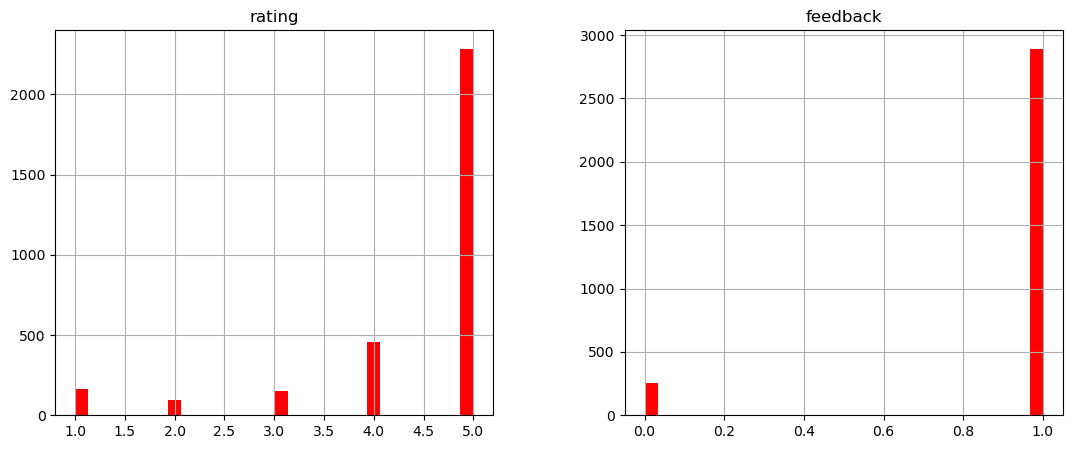

In [11]:
reviews_df.hist(bins=30, figsize=(13,5), color='r')

In [27]:
reviews_df['length'] = reviews_df['verified_reviews'].str.len()
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


<AxesSubplot:ylabel='Frequency'>

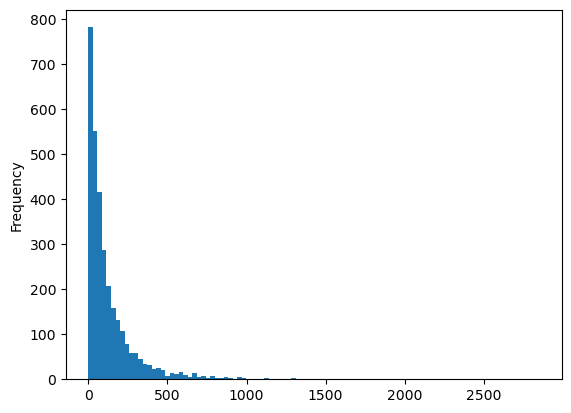

In [17]:
reviews_df['length'].plot(bins=100, kind='hist')

In [18]:
reviews_df.length.describe()

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

In [21]:
#longest
reviews_df[reviews_df['length']==2851]['verified_reviews']

2016    Incredible piece of technology.I have this rig...
Name: verified_reviews, dtype: object

In [22]:
#shortest
reviews_df[reviews_df['length']==1]['verified_reviews']

60      😍
85       
183      
219      
374      
       ..
3114     
3120     
3123     
3126     
3141     
Name: verified_reviews, Length: 81, dtype: object

In [23]:
#mean
reviews_df[reviews_df['length']==133]['verified_reviews']

28      Fun item to play with and get used to using.  ...
723     Fun item to play with and get used to using.  ...
1774    This is my 3rd Echo and with the built in hub ...
1794    Love the Echo Plus!! Much better versatility t...
1853    Comes with a hub.  Got it during prime day for...
1926    Mic hears everything but only understands abou...
Name: verified_reviews, dtype: object

In [28]:
positive = reviews_df[reviews_df['feedback']==1]
positive

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [29]:
negative = reviews_df[reviews_df['feedback']==0]
negative

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0,240
3091,1,30-Jul-18,Black Dot,I didn’t order it,0,17


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='feedback', ylabel='count'>

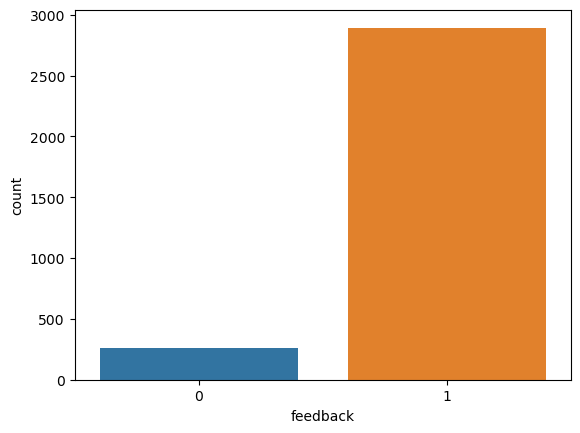

In [30]:
sns.countplot(reviews_df['feedback'], label='Count')

<AxesSubplot:xlabel='rating', ylabel='count'>

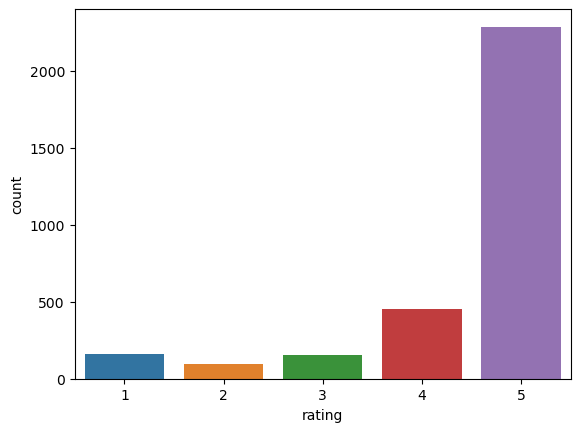

In [34]:
sns.countplot(data=reviews_df, x='rating')

<AxesSubplot:xlabel='variation', ylabel='rating'>

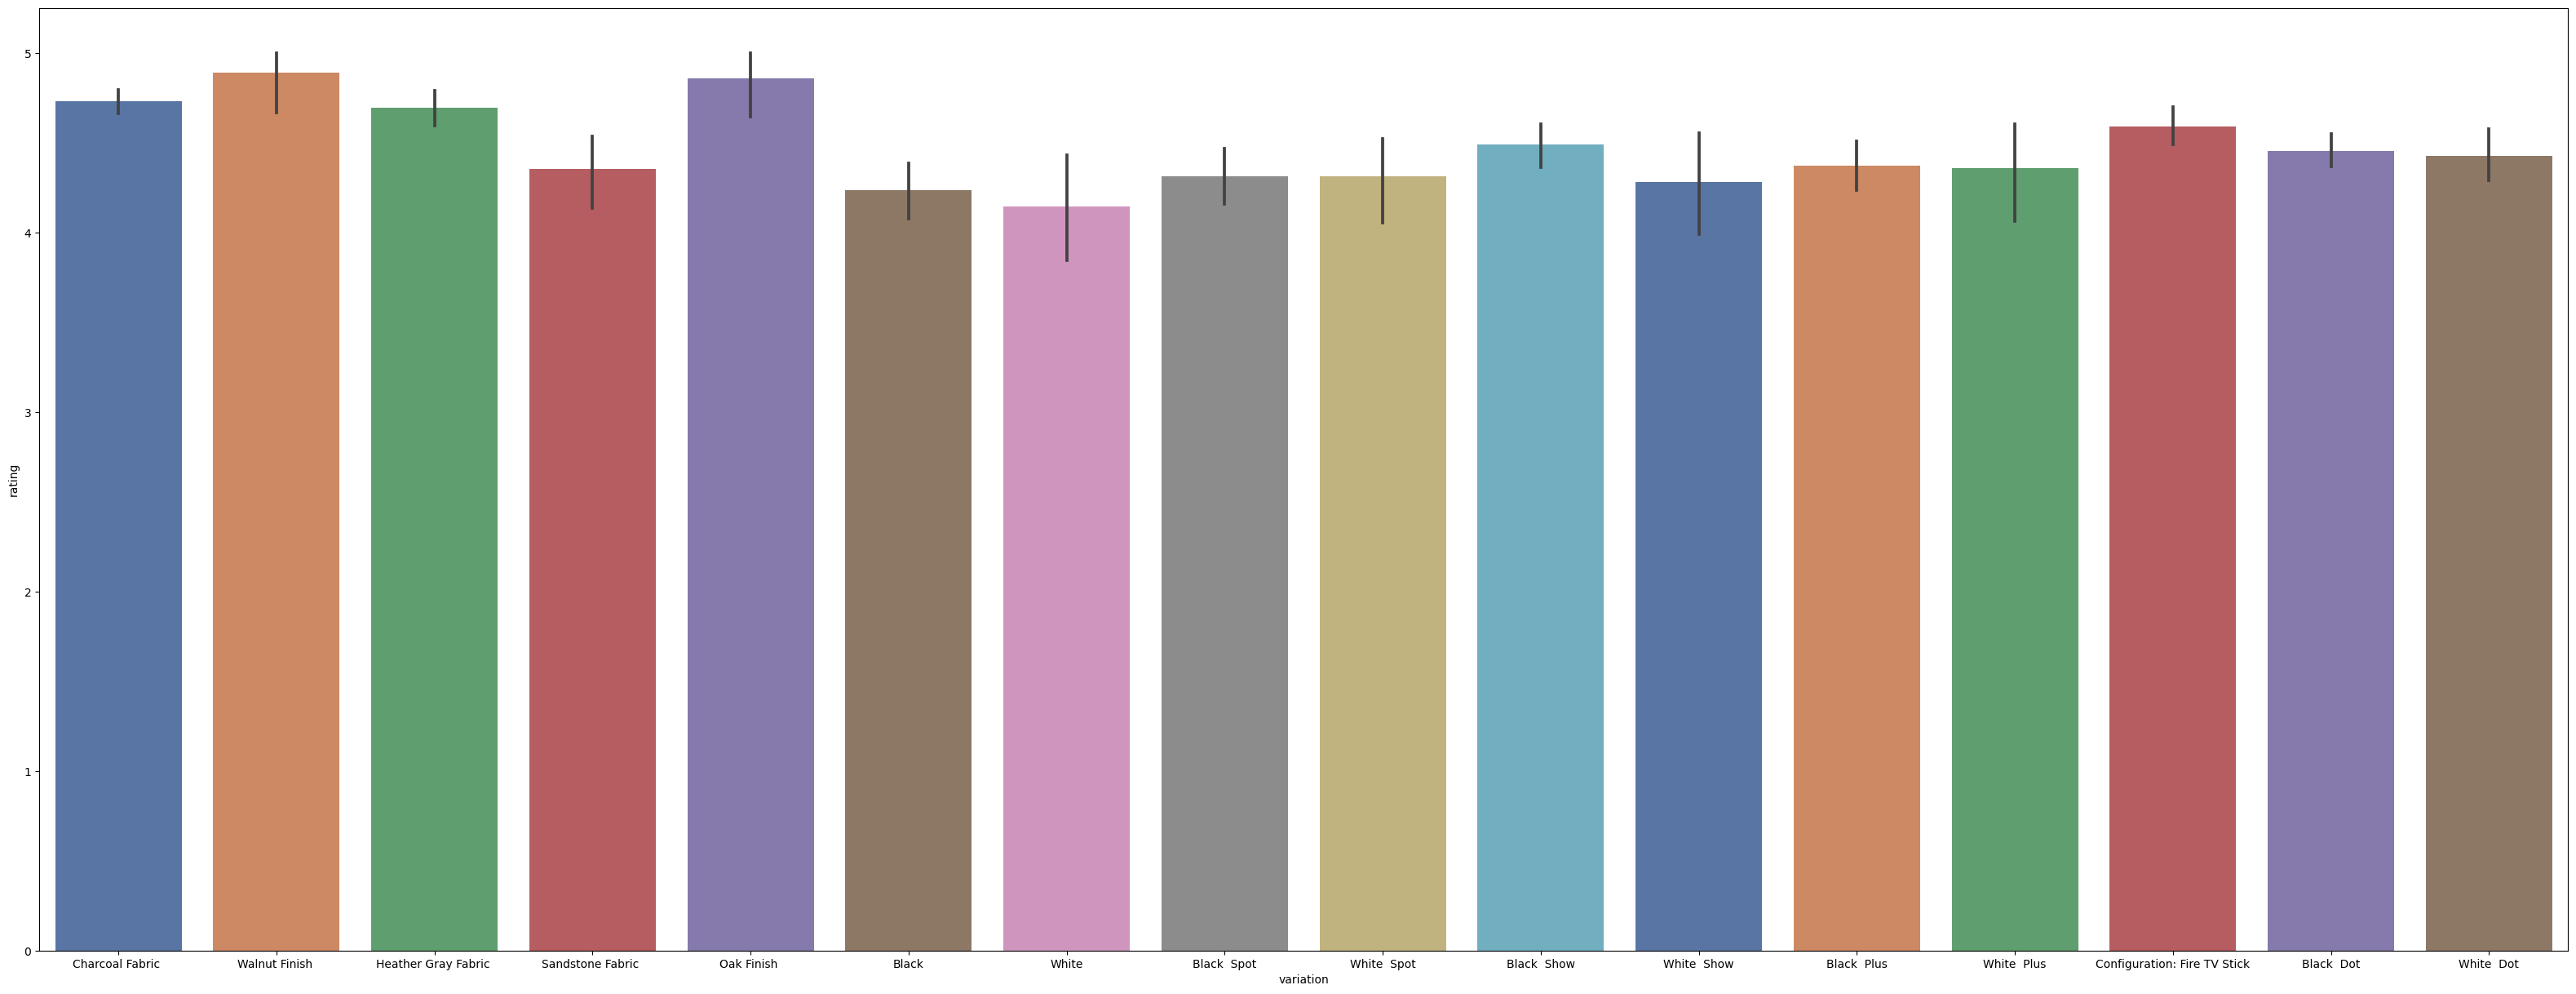

In [35]:
plt.figure(figsize=(40,15))

sns.barplot(x='variation', y='rating', data=reviews_df, palette='deep')

In [36]:
sentences = reviews_df['verified_reviews'].tolist()
sentences

['Love my Echo!',
 'Loved it!',
 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.',
 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.',
 'Music',
 'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.',
 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.',
 "I think this is the 5th one I've

In [40]:
sentence_as_one_string = " ".join(sentences)
sentence_as_one_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

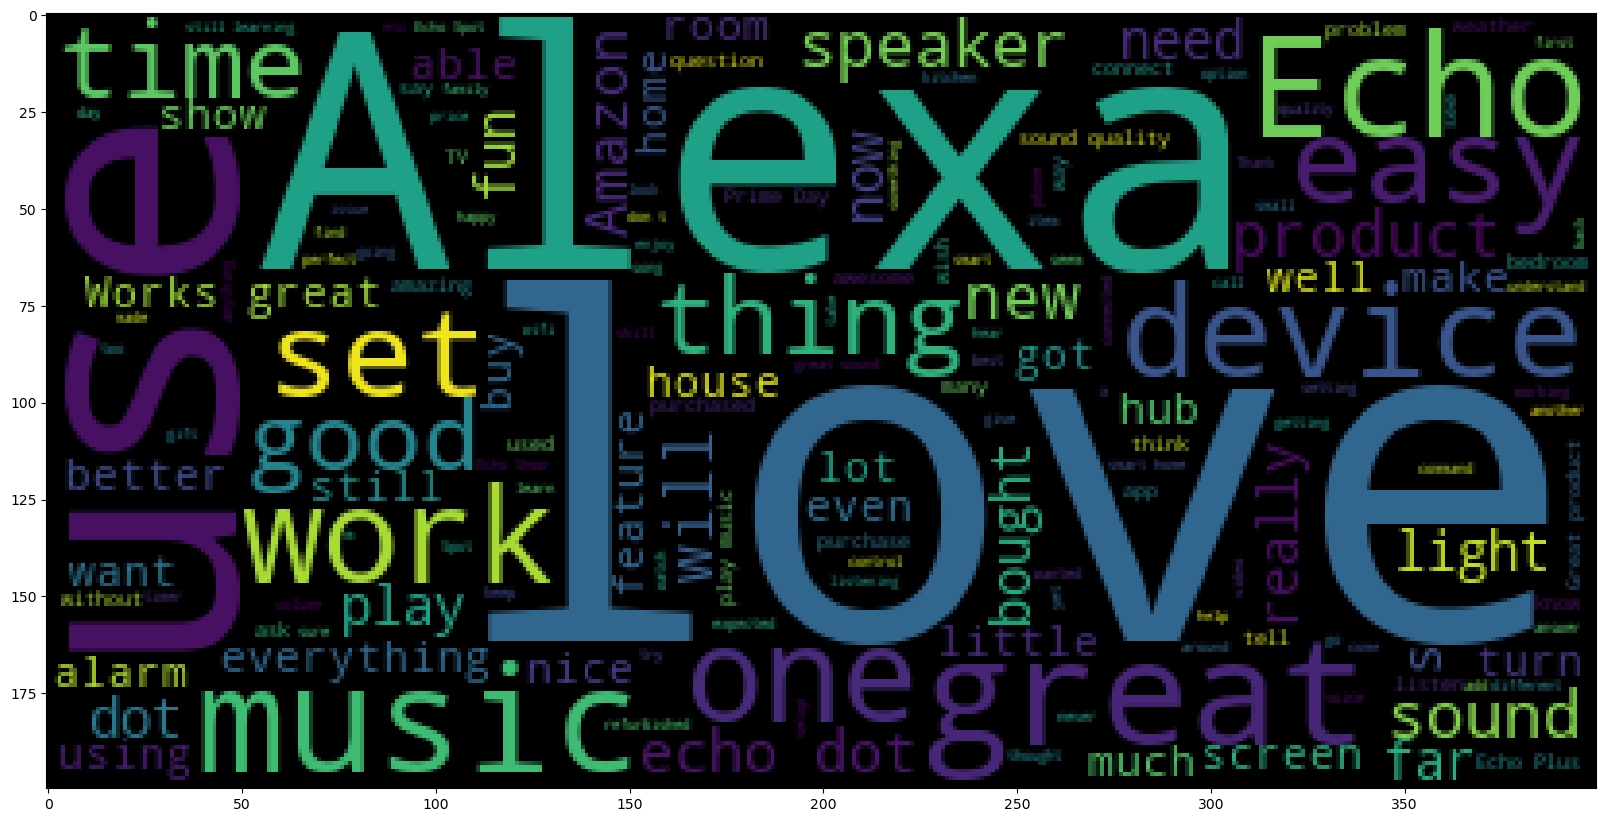

In [46]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentence_as_one_string))

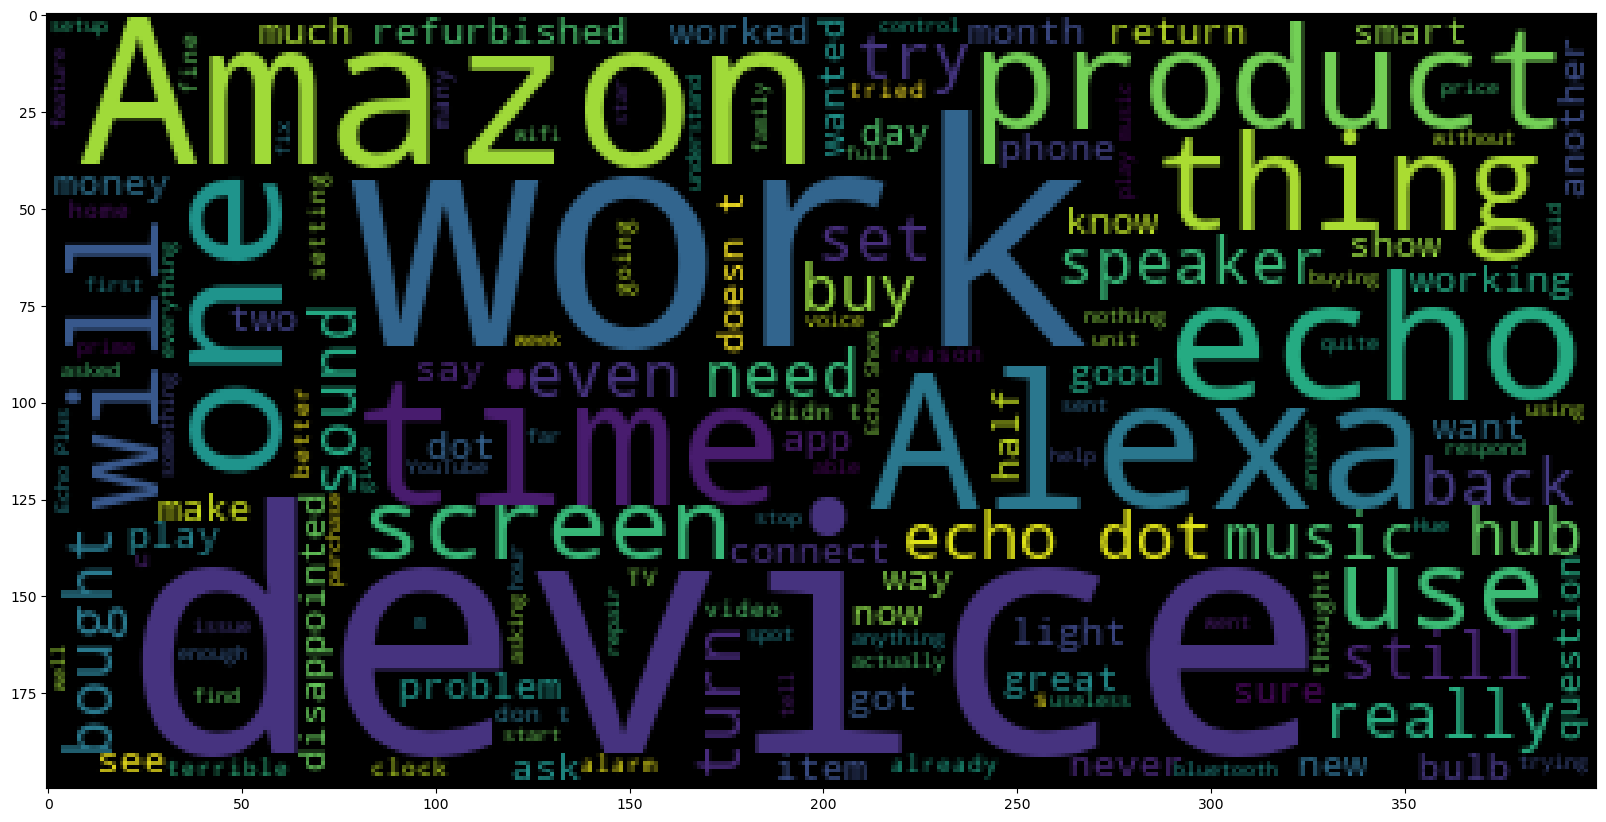

In [53]:
negative_list = negative['verified_reviews'].tolist()
negative_sentence_as_one_string = " ".join(negative_list)

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentence_as_one_string))

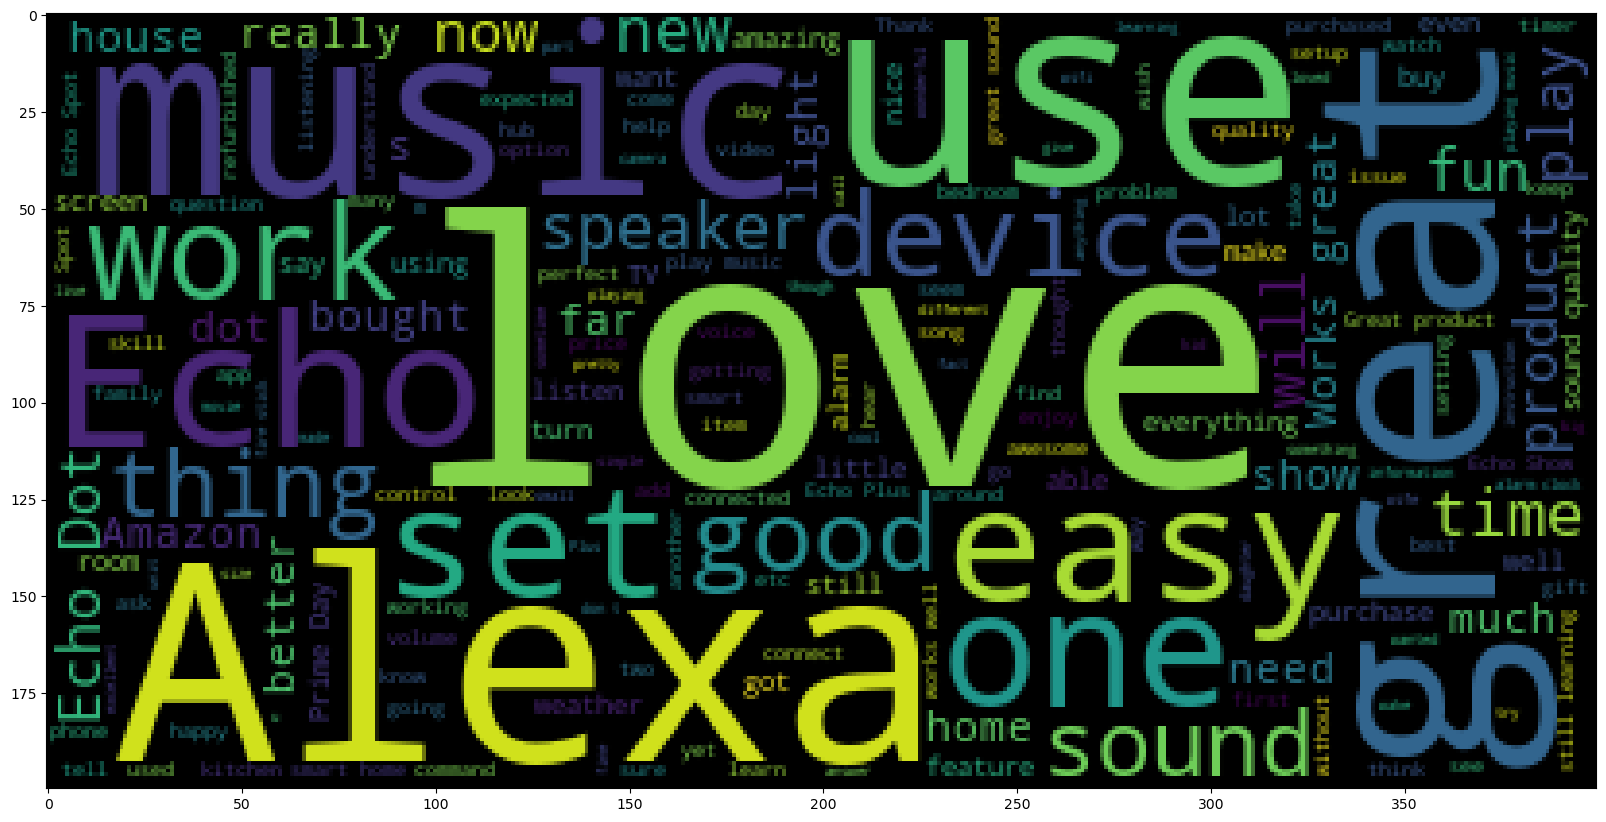

In [54]:
positive_list = positive['verified_reviews'].tolist()
positive_sentence_as_one_string = " ".join(positive_list)

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(positive_sentence_as_one_string))

# TASK #4: PERFORM DATA CLEANING

In [57]:
reviews_df.drop(['date','rating','length'],axis=1, inplace=True)
reviews_df

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1
...,...,...,...
3145,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,Black Dot,"Listening to music, searching locations, check...",1
3147,Black Dot,"I do love these things, i have them running my...",1
3148,White Dot,Only complaint I have is that the sound qualit...,1


In [58]:
variation_dummies = pd.get_dummies(reviews_df['variation'], drop_first=True)
variation_dummies

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [62]:
reviews_df.drop(['variation'], axis=1, inplace=True)
reviews_df = pd.concat([reviews_df, variation_dummies], axis=1)
reviews_df.head()

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


# TASK 5: COUNT VECTORIZATION (TOKENIZATION)

![alt text](https://drive.google.com/uc?id=1eQi-Gq66e-sNw1ZvGs-zkJg95mCYdFoJ)

In [84]:
# a pipeline to clean up all the messages
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_remove = [char for char in message if char not in string.punctuation]
    Test_punc_remove_join = " ".join(Test_punc_remove)
    Test_punc_removed_join_clean = [word for word in Test_punc_remove_join.split() if word.lower() not in stopwords.words('english')]
    
    return Test_punc_removed_join_clean

In [85]:
reviews_df_clean = reviews_df['verified_reviews'].apply(message_cleaning)
reviews_df_clean

0                                      [L, v, e, E, c, h]
1                                               [L, v, e]
2       [e, e, w, h, l, e, p, l, n, g, g, e, u, c, n, ...
3       [h, v, e, h, l, f, f, u, n, w, h, h, h, n, g, ...
4                                                  [u, c]
                              ...                        
3145    [P, e, r, f, e, c, f, r, k, u, l, n, e, v, e, ...
3146    [L, e, n, n, g, u, c, e, r, c, h, n, g, l, c, ...
3147    [l, v, e, h, e, e, h, n, g, h, v, e, h, e, r, ...
3148    [n, l, c, p, l, n, h, v, e, h, h, e, u, n, q, ...
3149                                                  [G]
Name: verified_reviews, Length: 3150, dtype: object

In [87]:
vectorizer = CountVectorizer(analyzer=message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [88]:
vectorizer.get_feature_names()

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'B',
 'C',
 'E',
 'F',
 'G',
 'H',
 'J',
 'K',
 'L',
 'N',
 'P',
 'Q',
 'R',
 'U',
 'V',
 'W',
 'X',
 'Z',
 'b',
 'c',
 'e',
 'f',
 'g',
 'h',
 'j',
 'k',
 'l',
 'n',
 'p',
 'q',
 'r',
 'u',
 'v',
 'w',
 'x',
 'z',
 'á',
 'é',
 'í',
 'ñ',
 'ó',
 'ú',
 '\u200b',
 '—',
 '‘',
 '’',
 '“',
 '”',
 '‼',
 '⏰',
 '❤',
 '⭐',
 '️',
 '🎶',
 '🏻',
 '🏾',
 '👍',
 '💋',
 '😁',
 '😂',
 '😄',
 '😉',
 '😊',
 '😍',
 '😎',
 '😏',
 '😑',
 '😔',
 '😥',
 '😬',
 '😳',
 '🤓']

In [89]:
reviews_countvectorizer.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [90]:
reviews_countvectorizer.shape

(3150, 82)

In [91]:
reviews_df.drop(['verified_reviews'], axis=1, inplace=True)

In [92]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray())
reviews

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
reviews_df = pd.concat([reviews_df, reviews], axis=1)
reviews_df

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,72,73,74,75,76,77,78,79,80,81
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
X = reviews_df.drop(['feedback'],axis=1)

In [95]:
y = reviews_df['feedback']

# TASK #6: NAIVE BAYES CLASSIFIER MODEL

![alt text](https://drive.google.com/uc?id=1Xox54bvjhGOhrG-fSxEUIEgw1R3g-RIt)

![alt text](https://drive.google.com/uc?id=18Z4ug4UuyQG79lyPKs1zQwtrP_S4_yoU)

![alt text](https://drive.google.com/uc?id=1sVLtg8GaE3ZhNEZX1WJbxs7KAQyQ5dpX)

![alt text](https://drive.google.com/uc?id=1NT6Fm-lWUWNsu9i8uzVS4Q5pcm5gp8RK)

![alt text](https://drive.google.com/uc?id=1C32q5Uguymr9012x1lzRD5btnvJ-kW9r)

![alt text](https://drive.google.com/uc?id=1g5aXo5E-RIjRBy6-LLLA8gjG2j9dIL5X)

![alt text](https://drive.google.com/uc?id=106OXP_z89Hqh1JYVaROIbst0N0CgFRuT)

![alt text](https://drive.google.com/uc?id=1AXTHZ9KVUsJjMm9Whc4Adi5T4OznsSYn)

In [100]:
X.shape

(3150, 97)

In [101]:
y.shape

(3150,)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [103]:
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


MultinomialNB()

# TASK #7: Model Evaluation

![alt text](https://drive.google.com/uc?id=14_ft6Wiu-VaiU_5Ew2nS7EGGr3oLLQf8)

In [105]:
y_predict = NB_classifier.predict(X_test)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


<AxesSubplot:>

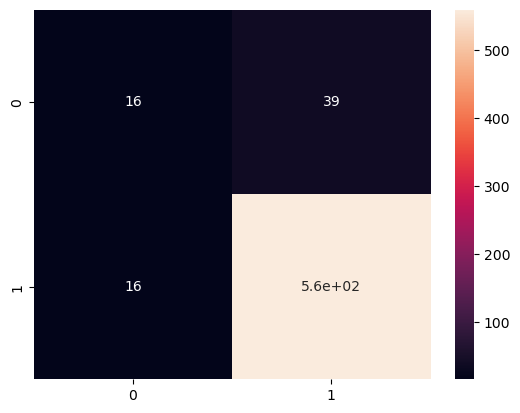

In [107]:
cm=confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

In [111]:
cr = classification_report(y_test, y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.50      0.29      0.37        55
           1       0.93      0.97      0.95       575

    accuracy                           0.91       630
   macro avg       0.72      0.63      0.66       630
weighted avg       0.90      0.91      0.90       630



# TASK #8: Logistic Regession Classifier

In [113]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [116]:
y_pred = lr.predict(X_test)
y_pred

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [117]:
accuracy_score(y_pred,y_test)

0.9126984126984127

<AxesSubplot:>

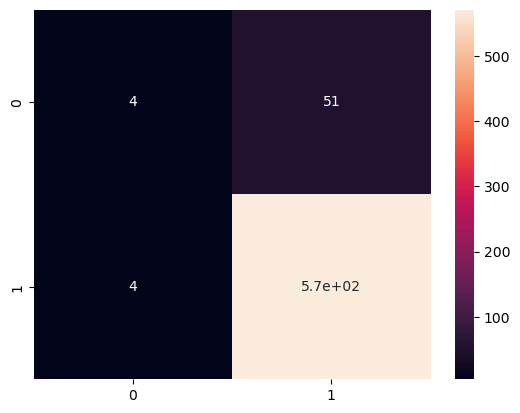

In [119]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [123]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.07      0.13        55
           1       0.92      0.99      0.95       575

    accuracy                           0.91       630
   macro avg       0.71      0.53      0.54       630
weighted avg       0.88      0.91      0.88       630

